# Imports

In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay
import glob
import matplotlib.image as mpimg
from IPython.display import Image, display
import csv
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from IPython.display import display_html
from itertools import chain,cycle

# Path list

In [24]:
path = '../data/'

path3 = '../Results_FINAL/A/dense201_hirar_new/'
path2 = '../Results_FINAL/A/dense201_hirar_6same20/'
path1 = '../Results_FINAL/A/dense201_hirar/'

# Label dictionaries

In [25]:
trans82 = {'18':'Eagle',
'68':'Tree',
'8':'Chair',
'60':'Standing',
'77':'Wide legged forward bend',
'16':'Dolphin',
'17':'Downward dog',
'36':'Intese side stretch',
'31':'Half moon',
'22':'Extended triangle',
'21':'Extended side angle',
'29':'Gate',
'75':'Warrior I',
'81':'ReverseWarrior',
'40':'Low lunges',
'74':'Warrior II',
'73':'Warrior III',
'39':'Lord of dance',
'62':'Standing big-toe hold',
'61':'Standing split',
'57':'Easy sitting',
'3':'Cobbler',
'28':'Garland',
'59':'Staff',
'41':'Noose',
'13':'Cow face',
'72':'Hero and thunderbolt',
'1':'Bhardwajas twist',
'30':'Half lord of the fishes',
'58':'Split',
'76':'Wide angle seated forward bend',
'34':'Head to knee',
'49':'Revolvedhead-toknee',
'52':'Seated forward bend',
'67':'Tortoise pose',
'0':'Shooting bow',
'35':'Heron',
'47':'King pigeon',
'14':'Cranecrow',
'53':'Shoulder pressing',
'11':'Cockerel',
'50':'Scale',
'24':'Firefly',
'55':'Side crane-crow',
'19':'Eight angle',
'46':'Sage Koundaniya',
'32':'Handstand',
'63':'Headstand',
'64':'Shoulderstand',
'23':'Feather peacock',
'37':'Legs up to wall',
'45':'Plow',
'51':'Scorpion',
'12':'Corpse',
'25':'Fish',
'33':'Happy baby',
'48':'Reclining hand-to-big-toe',
'79':'Wind relieving',
'65':'Reclining cobbler',
'66':'Reclining hero',
'80':'Yogic sleep',
'10':'Cobra',
'27':'Frog',
'38':'Locust',
'9':'Child',
'20':'Extended puppy',
'54':'Side reclining leg lift',
'56':'Side plank',
'15':'Dolphin plank',
'26':'Low plank (four limbedstaff)',
'44':'Plank',
'42':'Peacock',
'69':'Upward bow',
'70':'Upward facing two- foot staff',
'71':'Upward plank',
'43':'Pigeon',
'5':'Bridge',
'78':'Wild things',
'6':'Camel',
'7':'Cat-cow',
'2':' Boat',
'4':' Bow'}
#trans2 = {(str(int(key) - 1)):v for key,v in trans.items()}
trans82 = {int(k):str(v) for k,v in trans82.items()}
trans82_x = sorted(trans82.items())
#for key, value in sorted(trans82.items()): # Note the () after items!
 #   print(key, value)

In [26]:
trans20 = { '0': 'staright', '1': 'forward bend', '2': 'side bend', '3': 'others', '4': 'frontleg', '5': 'behindleg', 
         '6': 'split', '7': 'ffw bend', '8': 'twist', '9': 'front', '10': 'side', 
        '11': 'legs up', '12': 'legs bend', '13': 'up-facing', '14': 'down-facing', '15': 'side-facing', 
         '16': 'plank balance', '17': 'up-facing', '18': 'down-facing', '19': 'others'}
trans20 = {int(k):str(v) for k,v in trans20.items()}
trans20_x = sorted(trans20.items())

In [27]:
trans6 = {'0': 'standing', '1': 'sitting', '2': 'balancing', '3': 'inverted', '4': 'reclining', '5': 'wheel'}
trans6 = {int(k):str(v) for k,v in trans6.items()}
trans6_x = sorted(trans6.items())

### Label network

In [28]:
json_data = {"Yoga-82 labels": {"data":None, "children":[
{"standing":{"data": None, "children":[
                                            {"straight":    {"data": None, "children":[
                                                                                    {"1. Eagle\n2. Tree\n3. Chair": {"data": None}}
                                                                                    ]

                                            }},
                                            {"forward bend":    {"data": None, "children":[
                                                                                    {"4. Standing\nforward bend\n5. Wide legged\nforward bend\n6. Dolphin\n7.Downward dog\n8. Intese\nside stretch": {"data": None}}
                                                                                    ]
                                            }},
                                            {"side bend":    {"data": None, "children":[
                                                                                    {"9. Half moon\n10.Extended\ntriangle\n11. Extended\nside angle\n12. Gate\n13. Warrior I\n14. Reverse\nWarrior\n15. Low\nlunges": {"data": None}}
                                                                                    ]
                                        }},
                                             {"others":    {"data": None, "children":[
                                                                                    {"16. Warrior II\n17. Warrior III\n18. Lord of\ndance\n19. Standing\nbig-toe hold\n20.Standing\nsplit": {"data": None}}
                                                                                    ]
                                        }}
                                        ]
}},
{"sitting":{"data": None, "children":[
                                            {"frontleg":    {"data": None, "children":[
                                                                                    {"21. Easy\nsitting\n22. Cobbler\n23. Garland\n24. Staff\n25. Noose": {"data": None}}
                                                                                    ]

                                            }},
                                            {"behindleg":    {"data": None, "children":[
                                                                                    {"26. Cow face\n27.Hero and\nthunderbolt\n28. Bhardwaja's\ntwist\n29. Half lord of\nthe fishes": {"data": None}}
                                                                                    ]
                                            }},
                                            {"split":    {"data": None, "children":[
                                                                                    {"30. Split\n31. Wide\nangle\nseated\nforward\nbend": {"data": None}}
                                                                                    ]
                                        }},
                                             {"ffw bend":    {"data": None, "children":[
                                                                                    {"32. Head to\nknee\n33.Revolved\nhead-to-\nknee\n34. Seated\nforward\nbend\n35. Tortoise": {"data": None}}
                                                                                    ]
                                        }},
                                        {"twist":    {"data": None, "children":[
                                                                                    {"36. Shooting\nbow\n37. Heron\n38. King\npigeon": {"data": None}}
                                                                                    ]
                                        }}
                                       ]
                }},
{"balancing":{"data": None, "children":[
                                            {"front":    {"data": None, "children":[
                                                                                    {"39. Crane-\ncrow\n40. Shoulder\npressing\n41. Cockerel\n42. Scale\n43. Firefly": {"data": None}}
                                                                                    ]

                                            }},
                                            {"side":    {"data": None, "children":[
                                                                                {"44. Side\ncrane-crow\n45. Eight\nangle\n46. Sage\nKoundaniya": {"data": None}}
                                                                                    ]
                                            }}
                                        ]
                 }}, 
{"inverted": {"data": None, "children":[
                                            {"legs up":    {"data": None, "children":[
                                                                                {"47. Handstand\n48. Headstand\n49. Shoulder\nstand\n50. Feather\nPeacock\n 51.Legs up to\nwall": {"data": None}}
                                                                                    ]

                                            }},
                                            {"legs bend":    {"data": None, "children":[
                                                                                {"52. Plow\n53. Scorpion": {"data": None}}
                                                                                    ]
                                            }}
                                        ]
                }},
{"reclining":{"data": None, "children":[
                                            {"up-facing":    {"data": None, "children":[
                                                                                    {"54. Corpse\n55. Fish\n56. Happy baby\n 57. Reclining\nhand-to-big-toe\n58. Wind relieving\n59. Reclining\ncobbler\n60. Reclining\nhero\n61. Yogic sleep": {"data": None}}
                                                                                    ]

                                            }},
                                            {"down-facing":    {"data": None, "children":[
                                                                                {"62. Cobra\n63. Frog\n64. Locust\n65. Child\n66. Extended puppy": {"data": None}}
                                                                                    ]
                                            }},
                                            {"side-facing":    {"data": None, "children":[
                                                                                    {"67. Side\nreclining\nleg lift\nS68. ide\nplank": {"data": None}}
                                                                                    ]
                                        }},
                                             {"plank balance":    {"data": None, "children":[
                                                                                    {"69. Dolphin plank\n70. Low plank\n71. Plank\n72. Peacock": {"data": None}}
                                                                                    ]
                                        }}
                                        ]
                }},

{"wheel": {"data": None, "children":[
                                            {"up facing":    {"data": None, "children":[
                                                                                    {"73. Upward bow\n74. Upward\nfacing two- foot\nstaff\n75.Upward\nplank\n76. Pigeon\n77. Bridge\n78. Wild things\n79. Camel": {"data": None}}
                                                                                    ]

                                            }},
                                            {"down facing":    {"data": None, "children":[
                                                                                {"80. Coat-cow": {"data": None}}
                                                                                    ]
                                            }},
                                            {"other":    {"data": None, "children":[
                                                                                    {"81. Boat\n82. Bow": {"data": None}}
                                                                                    ]
                                        }}
                                        ]


            }}


        ]}}

In [29]:
'''import graphviz
#json_data = {"Harry": {"data": None, "children": [{"Bill": {"data": None}}, {"Jane": {"data": None, "children": [{"Diane": {"data": None}}, {"Mark": {"data": None}}]}}, {"Mary": {"data": None}}]}}
def get_node_info(node):
    node_name = list(node.keys())[0]
    node_data = node[node_name]['data']
    node_children = node[node_name].get('children', None)
    #print(node_name, node_data, node_children)
    return node_name, node_data, node_children

traversed_nodes = [json_data] # start with root node

# initialize the graph 
f = graphviz.Digraph('wide', filename='yoga82_Label_GRAPH2.gv')
f.attr(rankdir='TD', size='3,3')
f.attr('node', shape='rectangle')

while (len(traversed_nodes) > 0):
    cur_node = traversed_nodes.pop(0)
    cur_node_name, cur_node_data, cur_node_children = get_node_info(cur_node)
    if (cur_node_children is not None): # check if the cur_node has a child
        for next_node in cur_node_children: 
            traversed_nodes.append(next_node)
            next_node_name = get_node_info(next_node)[0]
            f.edge(cur_node_name, next_node_name, label='') # add edge to the graph

f.view()'''

'import graphviz\n#json_data = {"Harry": {"data": None, "children": [{"Bill": {"data": None}}, {"Jane": {"data": None, "children": [{"Diane": {"data": None}}, {"Mark": {"data": None}}]}}, {"Mary": {"data": None}}]}}\ndef get_node_info(node):\n    node_name = list(node.keys())[0]\n    node_data = node[node_name][\'data\']\n    node_children = node[node_name].get(\'children\', None)\n    #print(node_name, node_data, node_children)\n    return node_name, node_data, node_children\n\ntraversed_nodes = [json_data] # start with root node\n\n# initialize the graph \nf = graphviz.Digraph(\'wide\', filename=\'yoga82_Label_GRAPH2.gv\')\nf.attr(rankdir=\'TD\', size=\'3,3\')\nf.attr(\'node\', shape=\'rectangle\')\n\nwhile (len(traversed_nodes) > 0):\n    cur_node = traversed_nodes.pop(0)\n    cur_node_name, cur_node_data, cur_node_children = get_node_info(cur_node)\n    if (cur_node_children is not None): # check if the cur_node has a child\n        for next_node in cur_node_children: \n           

In [30]:
'''score = model.evaluate_generator(generator_val_batch(test_df,batch_size,num_classes,img_path),steps=test_steps_per_epoch, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])'''

"score = model.evaluate_generator(generator_val_batch(test_df,batch_size,num_classes,img_path),steps=test_steps_per_epoch, verbose=1)\nprint('Test loss:', score[0])\nprint('Test accuracy:', score[1])"

# Load data

In [31]:
Train_df = pd.read_csv(path + 'Train_df.csv')

Test_df = pd.read_csv(path + 'Test_df.csv')

Train_df.shape, Test_df.shape

((11258, 7), (3878, 7))

# Load logs

In [49]:
logV1_df = pd.read_csv(path1 + 'log_V1.csv')
logV1_df = logV1_df.rename(columns={"val_dense_accuracy": "82 classes", "val_dense_2_accuracy": "20 classes", "val_dense_1_accuracy": "6 classes"})
logV1_df.tail()

,epoch,dense_1_accuracy,dense_1_loss,dense_2_accuracy,dense_2_loss,dense_accuracy,dense_loss,loss,6 classes,val_dense_1_loss,20 classes,val_dense_2_loss,82 classes,val_dense_loss,val_loss
45,45,0.993487,0.032086,0.989240,0.048550,0.961019,0.148847,0.229483,0.469280,2.802858,0.334728,3.881686,0.410262,3.471085,10.155631
46,46,0.997168,0.017066,0.996319,0.024859,0.972534,0.111456,0.153381,0.567276,2.510899,0.459370,3.296531,0.475446,2.974535,8.781964
47,47,0.997546,0.013241,0.997263,0.019694,0.980085,0.090195,0.123130,0.612640,2.007064,0.502973,2.883257,0.599868,1.909880,6.800200
48,48,0.999717,0.005951,0.999434,0.009741,0.984332,0.072898,0.088590,0.633561,1.947877,0.522352,2.763535,0.528078,2.380911,7.092321
49,49,0.999151,0.006245,0.998962,0.009390,0.987164,0.061449,0.077084,0.605814,2.103456,0.497908,2.920131,0.532922,2.583889,7.607476


<Axes: >

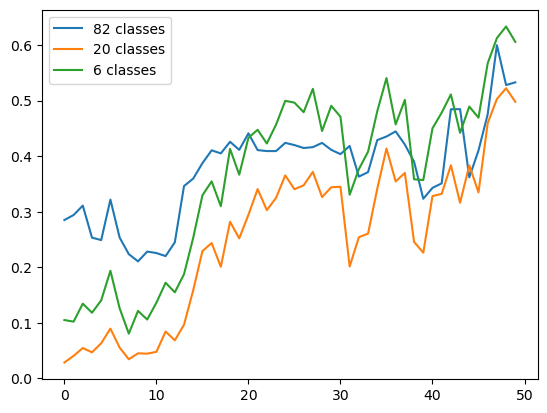

In [48]:
logV1_df[["82 classes", "20 classes", "6 classes"]].plot.line()

In [50]:
logV2_df = pd.read_csv(path2 + 'log_V2.csv')
logV2_df = logV2_df.rename(columns={"val_dense_accuracy": "82 classes", "val_dense_2_accuracy": "20 classes", "val_dense_1_accuracy": "6 classes"})
logV2_df.tail()

,epoch,dense_1_accuracy,dense_1_loss,dense_2_accuracy,dense_2_loss,dense_accuracy,dense_loss,loss,6 classes,val_dense_1_loss,20 classes,val_dense_2_loss,82 classes,val_dense_loss,val_loss
25,35.0,1.000000,0.001382,1.0,0.003358,1.0,0.000470,0.005209,0.708434,1.384181,0.603832,1.977830,0.798503,0.951584,4.313595
26,36.0,1.000000,0.001295,1.0,0.003121,1.0,0.000441,0.004856,0.708434,1.387034,0.604713,1.982532,0.798503,0.953360,4.322925
27,37.0,1.000000,0.001218,1.0,0.002915,1.0,0.000416,0.004549,0.708434,1.389883,0.604713,1.987111,0.798282,0.955101,4.332095
28,371.0,0.964224,4.310665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,38.0,1.000000,0.001165,1.0,0.002752,1.0,0.000396,0.004313,0.710416,1.369233,0.609557,1.983335,0.798723,0.965613,4.318181


<Axes: >

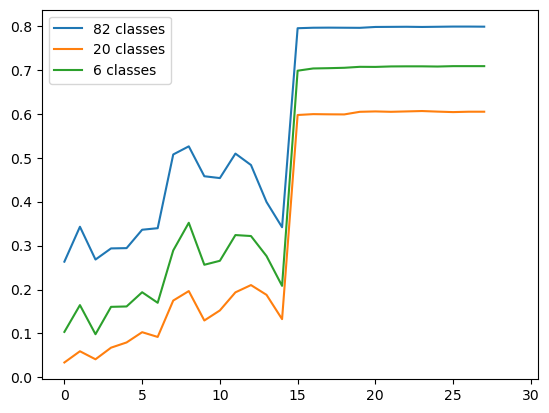

In [51]:
logV2_df[["82 classes", "20 classes", "6 classes"]].plot.line()

In [56]:
logV3_df = pd.read_csv(path3 + 'logV3_2.csv')
logV3_df = logV3_df.rename(columns={"val_dense_accuracy": "82 classes", "val_dense_2_accuracy": "20 classes", "val_dense_1_accuracy": "6 classes"})
logV3_df

,epoch,dense_1_accuracy,dense_1_loss,dense_2_accuracy,dense_2_loss,dense_accuracy,dense_loss,loss,6 classes,val_dense_1_loss,20 classes,val_dense_2_loss,82 classes,val_dense_loss,val_loss
0,0,0.093440,2.950926,0.030014,4.375716,0.265503,1.752847,9.079488,0.089628,3.102427,0.032812,4.601115,0.257873,1.741132,9.444675
1,1,0.140444,2.790974,0.048608,4.196632,0.329967,1.663741,8.651352,0.069808,3.271716,0.029949,4.802020,0.264699,1.825183,9.898919
2,2,0.185748,2.618127,0.083058,3.933376,0.379330,1.575281,8.126784,0.090729,3.315265,0.033253,4.928583,0.252808,2.026779,10.270624
3,3,0.245021,2.425426,0.129212,3.635066,0.426050,1.482503,7.542998,0.079278,4.058620,0.038318,5.679282,0.232328,2.622761,12.360664
4,4,0.313733,2.195489,0.186597,3.289486,0.473148,1.378972,6.863947,0.172429,3.896401,0.065404,5.615773,0.340233,2.629472,12.141647
5,5,0.379047,1.964401,0.255498,2.941242,0.519773,1.280535,6.186177,0.122880,3.827683,0.061000,5.196898,0.264039,2.832302,11.856885
6,6,0.452194,1.741753,0.329023,2.605953,0.564606,1.172190,5.519895,0.177714,3.447652,0.098657,4.634063,0.319974,2.255048,10.336761
7,7,0.517508,1.524469,0.402643,2.288718,0.608872,1.056972,4.870156,0.194010,3.733303,0.102621,4.845229,0.359833,1.972381,10.550914
8,8,0.583672,1.323641,0.466918,2.013067,0.652761,0.946303,4.283011,0.181678,3.980968,0.101740,4.889143,0.345519,2.025017,10.895126
9,9,0.631996,1.157224,0.518924,1.785592,0.689854,0.848734,3.791549,0.184321,6.027350,0.077956,7.404765,0.355869,2.935960,16.368076


<Axes: >

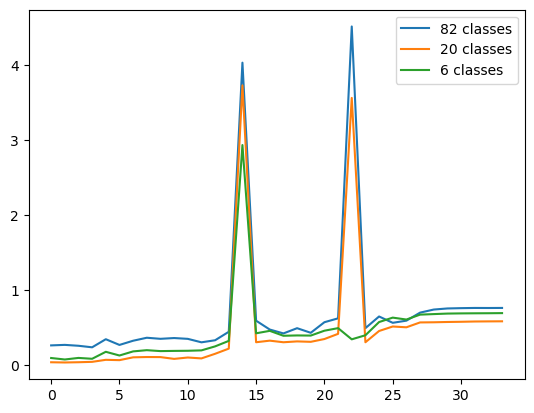

In [57]:
logV3_df[["82 classes", "20 classes", "6 classes"]].plot.line()

# Load probabilities

In [22]:
#arrays
probabilities_V1 = np.loadtxt(path1 + 'probabilities_V1.txt', dtype=int)
probabilities_V2 = np.loadtxt(path1 + 'probabilities_V2.txt', dtype=int)
probabilities_V3 = np.loadtxt(path1 + 'probabilities_V3.txt', dtype=int)

FileNotFoundError: ../Results_FINAL/A/50epoch_FULL/dense201_hirar/probabilities_V1.txt not found.

# Load predictions

In [21]:
#arrays
predictions6_V1 = np.loadtxt(path1 + 'predictions6.txt', dtype=int)
predictions20_V1 = np.loadtxt(path1 + 'predictions20.txt', dtype=int)
predictions82_V1 = np.loadtxt(path1 + 'predictions82.txt', dtype=int)

'''predictions6_V2 = np.loadtxt(path2 + 'predictions6.txt', dtype=int)
predictions20_V2 = np.loadtxt(path2 + 'predictions20.txt', dtype=int)
predictions82_V2 = np.loadtxt(path2 + 'predictions82.txt', dtype=int)

predictions6_V3 = np.loadtxt(path3 + 'predictions6.txt', dtype=int)
predictions20_V3 = np.loadtxt(path3 + 'predictions20.txt', dtype=int)
predictions82_V3 = np.loadtxt(path3 + 'predictions82.txt', dtype=int)
'''
predictions6_V1.shape

FileNotFoundError: ../Results_FINAL/A/50epoch_FULL/dense201_hirar/predictions6.txt not found.

In [ ]:
from sklearn.metrics import accuracy_score

true6_V3 = Test_df['label of class_6'].to_numpy()
accuracy_score(predictions6_V3, true6_V3, normalize=True)

#SAME AS IN CLASSIFICATION REPORT
#NOT SAME AS IN LOG

# Classification reports by levels

In [ ]:
def correctLabels_82(classification_report82_V3):
    classification_report82_V1 = class_report(path3 + 'classification_report82.csv').reset_index(drop=True)
    classification_report82_V1['index1'] = classification_report82_V1.index
    classification_report82_V1 = classification_report82_V1.replace({"index1": trans82})
    classification_report82_V1.iloc[-3:, classification_report82_V1.columns.get_loc('index1')] = ['accuracy', 'macro avg', 'weighted avg']
    classification_report82_V1 = classification_report82_V1.set_index('index1')
    return classification_report82_V1

In [ ]:
#class report as pandas df
def class_report(path):
    report= pd.read_csv(path).T
    report.columns = report.iloc[0]
    report.drop(index=report.index[0], axis=0, inplace=True)
    report.columns.name = None

    return report

def plotClassReport(df):
    
    df['support'] = df.support.apply(int)

    styles = [dict(selector="caption", props=[("text-align", "center"),
                                              ("font-size", "120%"),
                                              ("font-weight", "bold"),
                                             ("color", 'black')])]
    return df.style.background_gradient(cmap='viridis',subset=pd.IndexSlice[:, :'f1-score']).set_caption("Classification Report").set_table_styles(styles)
    

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

'''classification_report6_V1 = class_report(path1 + 'classification_report6.csv')
classification_report20_V1 = class_report(path1 + 'classification_report20.csv')
classification_report82_V1 = correctLabels_82(class_report(path1 + 'classification_report82.csv'))

classification_report6_V2 = class_report(path2 + 'classification_report6.csv')
classification_report20_V2 = class_report(path2 + 'classification_report20.csv')
classification_report82_V2 = correctLabels_82(class_report(path2 + 'classification_report82.csv'))'''

classification_report6_V3 = class_report(path3 + 'classification_report6.csv')
classification_report20_V3 = class_report(path3 + 'classification_report20.csv')
classification_report82_V3 = correctLabels_82(class_report(path3 + 'classification_report82.csv'))


def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def getAcc(df):
    acc = df._get_value('accuracy', 'precision')
    f1 = df._get_value('weighted avg', 'f1-score')
    print(namestr(df, globals()))
    print('-----------------------------')
    print('Accuracy: ', round(acc, 3), '\nF1 SCORE: ', round(f1, 2))
    print()

'''print('')
print('____________________________________________________')
print('******** VARIANT 1 ********')
getAcc(classification_report6_V1)
getAcc(classification_report20_V1)
getAcc(classification_report82_V1)

print('')
print('____________________________________________________')
print('******** VARIANT 2 ********')
getAcc(classification_report6_V2)
getAcc(classification_report20_V2)
getAcc(classification_report82_V2)'''

print('')
print('____________________________________________________')
print('******** VARIANT 3 ********')
getAcc(classification_report6_V3)
getAcc(classification_report20_V3)
getAcc(classification_report82_V3)

In [ ]:
#display_side_by_side(plotClassReport(classification_report6_V1),plotClassReport(classification_report20_V1),plotClassReport(classification_report82_V1), titles=['Version 1 - 6 classes','Version 1 - 20 classes', 'Version 1 - 82 classes'])

In [ ]:
#display_side_by_side(plotClassReport(classification_report6_V2),plotClassReport(classification_report20_V2),plotClassReport(classification_report82_V2), titles=['Version 2 - 6 classes','Version 2 - 20 classes', 'Version 2 - 82 classes'])

In [ ]:
display_side_by_side(plotClassReport(classification_report6_V3),plotClassReport(classification_report20_V3),plotClassReport(classification_report82_V3), titles=['Version 3 - 6 classes','Version 3 - 20 classes', 'Version 3 - 82 classes'])

# Accuracy plots


NOT RIGHT OR?

## Varaiant 1-2-3

In [ ]:
listOfImageNames1 = []
for img in glob.glob(path1 + "*.png"):
    listOfImageNames1.append(img)
    
listOfImageNames2 = []
for img in glob.glob(path2 + "*.png"):
    listOfImageNames2.append(img)
    
listOfImageNames3 = []
for img in glob.glob(path3 + "*.png"):
    listOfImageNames3.append(img)
    
fig = plt.figure(figsize=(20,20))
rows = 1
columns = 3
  
# reading images
Image1 = cv2.imread(listOfImageNames3[0])
Image2 = cv2.imread(listOfImageNames3[0])
Image3 = cv2.imread(listOfImageNames3[0])

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')

# Create tree structured label data

In [ ]:
label_df = Train_df.drop(['Unnamed: 0','YogaPoses', 'ImageNumbers', '_merge'], axis=1)
label_df=label_df.replace({"label of class_6": trans6})
label_df=label_df.replace({"label of class_20": trans20})
label_df=label_df.replace({"label of class_82": trans82})
label_df = label_df.drop_duplicates().reset_index(drop=True)
label_df

## Check predictions in Variant1

### Check tree structure

In [ ]:
'''CREATE PREDICTED TREE DATA'''
df_V1 = pd.DataFrame({'predictions6_V1':predictions6_V1, 'predictions20_V1':predictions20_V1, 'predictions82_V1':predictions82_V1})

df_V1=df_V1.replace({"predictions6_V1": trans6})
df_V1=df_V1.replace({"predictions20_V1": trans20})
df_V1=df_V1.replace({"predictions82_V1": trans82})
df_V11 = df_V1.drop_duplicates().reset_index(drop=True)
#print(df_V11)

In [ ]:
#unique predictions - How many classes were predicted per level?
print (df_V1['predictions6_V1'].str.split(';\s*', expand=True).stack().unique())
print (df_V1['predictions20_V1'].str.split(';\s*', expand=True).stack().unique())
print (df_V1['predictions82_V1'].str.split(';\s*', expand=True).stack().unique())

### List which path could follow the label structure

#### all 3 level

In [ ]:
'''WHICH PREDICTION FOLLOWED THE TREE'''
check_df = df_V11.rename(columns={'predictions6_V1': 'label of class_6','predictions20_V1': 'label of class_20', 'predictions82_V1': 'label of class_82'})
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#not followed
#check_df[~i1.isin(i2)]
#followed
check_df[i1.isin(i2)]

#### first 2 level

In [ ]:
'''check 2 combination '''
check_df = df_V11.rename(columns={'predictions6_V1': 'label of class_6','predictions20_V1': 'label of class_20', 'predictions82_V1': 'label of class_82'})
#check_df = check_df.drop(['label of class_82'], axis=1)
#label_df = label_df.drop(['label of class_82'], axis=1)
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#not followed
#check_df[~i1.isin(i2)]
#followed
check_df[i1.isin(i2)]

#### last 2 level

## Check predictions in Variant2

### Check tree structure

In [ ]:
df_V2 = pd.DataFrame({'predictions6_V2':predictions6_V2, 'predictions20_V2':predictions20_V2, 'predictions82_V2':predictions82_V2})
df_V2=df_V2.replace({"predictions6_V2": trans6})
df_V2=df_V2.replace({"predictions20_V2": trans20})
df_V2=df_V2.replace({"predictions82_V2": trans82})
df_V11 = df_V2.drop_duplicates().reset_index(drop=True)
#print(df_V11)

In [ ]:
#unique predictions - How many classes were predicted per level?
print (df_V2['predictions6_V2'].str.split(';\s*', expand=True).stack().unique())
print (df_V2['predictions20_V2'].str.split(';\s*', expand=True).stack().unique())
print (df_V2['predictions82_V2'].str.split(';\s*', expand=True).stack().unique())

### List which path could follow the label structure

#### all 3 level

In [ ]:
'''check 2 combination '''
check_df = df_V11.rename(columns={'predictions6_V2': 'label of class_6','predictions20_V2': 'label of class_20', 'predictions82_V2': 'label of class_82'})
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#not followed
#check_df[~i1.isin(i2)]
#followed
check_df[i1.isin(i2)]

#### first 2 level

In [ ]:
'''check 2 combination '''
check_df = df_V11.rename(columns={'predictions6_V2': 'label of class_6','predictions20_V2': 'label of class_20', 'predictions82_V2': 'label of class_82'})
#check_df = check_df.drop(['label of class_82'], axis=1)
#label_df = label_df.drop(['label of class_82'], axis=1)
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#not followed
#check_df[~i1.isin(i2)]
#followed
check_df[i1.isin(i2)]

#### last 2 level

## Check predictions in Variant 3

### Check all sample match

In [ ]:
'''Ground truth'''
PerfectTestCheck_df = PerfectTest_df.drop(['Unnamed: 0', 'YogaPoses', '_merge'], axis=1) 
PerfectTestCheck_df = PerfectTestCheck_df.replace({"label of class_6": trans6})
PerfectTestCheck_df = PerfectTestCheck_df.replace({"label of class_20": trans20})
PerfectTestCheck_df = PerfectTestCheck_df.replace({"label of class_82": trans82})
#PerfectTestCheck_df

'''Predictions'''
df_V3 = pd.DataFrame({'predictions6_V3':predictions6_V3, 'predictions20_V3':predictions20_V3, 'predictions82_V3':predictions82_V3})
df_V3=df_V3.replace({"predictions6_V3": trans6})
df_V3=df_V3.replace({"predictions20_V3": trans20})
df_V3=df_V3.replace({"predictions82_V3": trans82})
df_V3 = df_V3.rename(columns={'predictions6_V3': 'label of class_6','predictions20_V3': 'label of class_20', 'predictions82_V3': 'label of class_82'})
df_V3['ImageNumbers'] = PerfectTestCheck_df['ImageNumbers']
cols = list(df_V3.columns)
cols = [cols[-1]] + cols[:-1]
df_V3 = df_V3[cols]
#df_V3


'''COMPARE'''  
'''BLACK IS PREDICTED RIGHT'''
compare = PerfectTestCheck_df.compare(df_V3, keep_shape=True).drop('other', level=1, axis=1)
compare = compare.droplevel(1, axis=1).dropna(how='all')
filtered = PerfectTestCheck_df.loc[compare.index]
def color_cells(s):
    if pd.notna(s):
        return 'color:{0}; font-weight:bold'.format('orange')
    else:
        return ''

Compared_df = filtered.style.apply(lambda x: compare.applymap(color_cells), axis=None)
Compared_df

### Check tree structure

In [ ]:
#predicted combinations
df_V11 = df_V3.drop(['ImageNumbers'], axis=1).drop_duplicates().reset_index(drop=True)
#print(df_V11)

In [ ]:
#unique predictions - How many classes were predicted per level?
print (df_V3['label of class_6'].str.split(';\s*', expand=True).stack().unique())
print (df_V3['label of class_20'].str.split(';\s*', expand=True).stack().unique())
print (df_V3['label of class_82'].str.split(';\s*', expand=True).stack().unique())

### List which path could follow the label structure

#### all 3 level

In [ ]:
'''check 2 combination '''
check_df = df_V11#.rename(columns={'predictions6_V3': 'label of class_6','predictions20_V3': 'label of class_20', 'predictions82_V3': 'label of class_82'})
label_df = PerfectTestCheck_df.drop(['ImageNumbers'], axis=1)
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#print(i2)
#followed
check_df[i1.isin(i2)]

In [ ]:
x = df_V3.loc[(df_V3['label of class_6'] == 'sitting') & (df_V3['label of class_20'] == 'behindleg') & (df_V3['label of class_82'] == 'Bhardwajas twist')]
finding = x[~x.isnull().any(axis=1)]
#finding

y = PerfectTestCheck_df.loc[(PerfectTestCheck_df['label of class_6'] == 'sitting') & (PerfectTestCheck_df['label of class_20'] == 'behindleg') & (PerfectTestCheck_df['label of class_82'] == 'Bhardwajas twist')]
finding2 = y[~y.isnull().any(axis=1)]
finding2
#???????????????????????????????????????????????????????????+  TRY TO FIND THE RIGHT CLASSIFIED PICTURE

In [ ]:
df = pd.merge(finding, finding2, on=['ImageNumbers', 'label of class_6', 'label of class_20', 'label of class_82'])
df

In [ ]:
#Image(filename='../data/Yoga-82/YOGA_downloads/Bharadvaja's_Twist_pose_or_Bharadvajasana_I_/40.jpg') 

In [ ]:
PerfectTestCheck_df.loc[PerfectTestCheck_df['ImageNumbers'] == '40.jpg']

In [ ]:
'''
compared_df = PerfectTestCheck_df.compare(finding, keep_shape=True).drop('other', level=1, axis=1)
compared_df = compared_df.droplevel(1, axis=1).dropna(how='all')
filtered = PerfectTestCheck_df.loc[compare.index]
def color_cells(s):
    if pd.notna(s):
        return 'color:{0}; font-weight:bold'.format('orange')
    else:
        return ''

Compared_df = filtered.style.apply(lambda x: compare.applymap(color_cells), axis=None)
Compared_df'''

#### first 2 level

In [ ]:
'''check 2 combination '''
check_df = df_V11.rename(columns={'predictions6_V3': 'label of class_6','predictions20_V3': 'label of class_20', 'predictions82_V3': 'label of class_82'})
check_df = check_df.drop(['label of class_82'], axis=1)
#label_df = label_df.drop(['label of class_82'], axis=1)
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#not followed
check_df[~i1.isin(i2)]
##followed
#check_df[i1.isin(i2)]

#### last 2 level

In [ ]:
keys = list(label_df.columns.values)
i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
check_df[~i1.isin(i2)]

# Load confusion matrices

In [ ]:
test_df = PerfectTest_df

def load_cm(path):
    cm = torch.load(path)
    proto_tensor = tf.make_tensor_proto(cm)
    cmx = tf.make_ndarray(proto_tensor)
    return cmx

'''# Load cms
cm6_V1 = load_cm(path1 + 'cm6.pt')
cm6_V1 = cm6_V1.astype('float') / cm6_V1.sum(axis=1)[:, np.newaxis]
cm20_V1 = load_cm(path1 + 'cm20.pt')
cm82_V1 = load_cm(path1 + 'cm82.pt')

cm6_V2 = load_cm(path2 + 'cm6.pt')
cm20_V2 = load_cm(path2 + 'cm20.pt')
cm82_V2 = load_cm(path2 + 'cm82.pt')'''

cm6_V3 = load_cm(path3 + 'cm6.pt')
cm20_V3 = load_cm(path3 + 'cm20.pt')
cm82_V3 = load_cm(path3 + 'cm82.pt')

In [ ]:
test_labels6_str = [i[1] for i in trans6_x]
test_labels20_str = [i[1] for i in trans20_x]
test_labels82_str = [i[1] for i in trans82_x]

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(1,3)


'''disp = ConfusionMatrixDisplay(cm6_V1, display_labels=test_labels6_str)
disp.plot(ax=ax[0], include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

disp = ConfusionMatrixDisplay(cm6_V2, display_labels=test_labels6_str)
disp.plot(ax=ax[1], include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)
'''

disp = ConfusionMatrixDisplay(cm6_V3, display_labels=test_labels6_str)
disp.plot(ax=ax[2], include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

plt.tight_layout()

In [ ]:
plt.rcParams["figure.figsize"] = (10,20)
fig, ax = plt.subplots(3,1)

'''disp = ConfusionMatrixDisplay(cm20_V1, display_labels=test_labels20_str)
disp.plot(ax=ax[0], include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

disp = ConfusionMatrixDisplay(cm20_V2, display_labels=test_labels20_str)
disp.plot(ax=ax[1], include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)
'''
disp = ConfusionMatrixDisplay(cm20_V3, display_labels=test_labels20_str)
disp.plot(ax=ax[2], include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

plt.tight_layout()

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)

disp = ConfusionMatrixDisplay(cm82_V1, display_labels=test_labels82_str)
disp.plot(ax=None, include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)
disp = ConfusionMatrixDisplay(cm82_V2, display_labels=test_labels82_str)
disp.plot(ax=None, include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)
disp = ConfusionMatrixDisplay(cm82_V3, display_labels=test_labels82_str)
disp.plot(ax=None, include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)